In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [5]:
wine = load_wine()
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c),
      "Random Forest:{}".format(score_r))

Single Tree:0.9259259259259259 Random Forest:0.9814814814814815


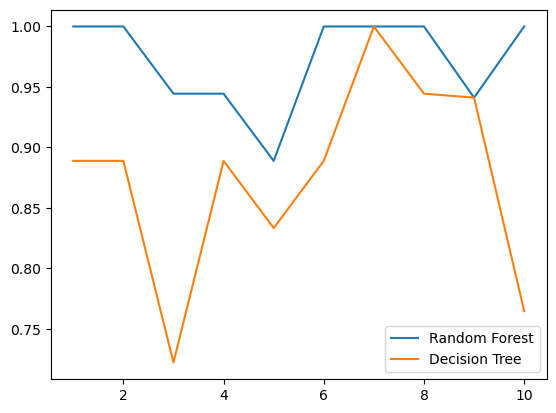

In [16]:
#10次交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
    
plt.plot(range(1,11),rfc_s,label = "Random Forest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

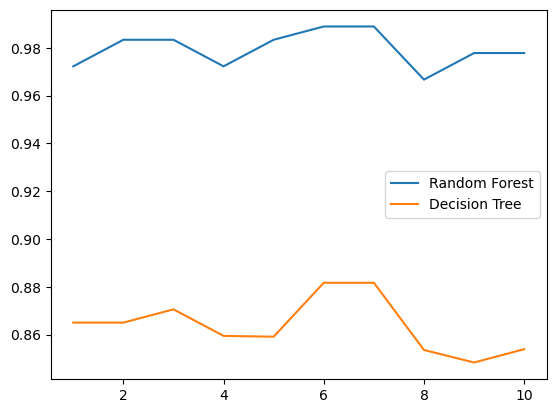

In [19]:
#10组10次交叉验证
rfc_l = []
clf_l = []


for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()